In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
data=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
69,12-05-2020,3702,74519
70,13-05-2020,3485,78004
71,14-05-2020,4261,82265
72,15-05-2020,3449,85714


In [3]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
69,69,74519
70,70,78004
71,71,82265
72,72,85714


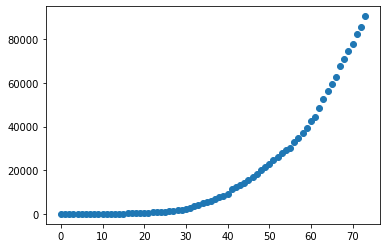

In [4]:

plt.scatter(data['days'], data['confirmed'])


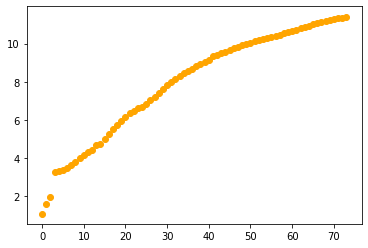

In [5]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [6]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

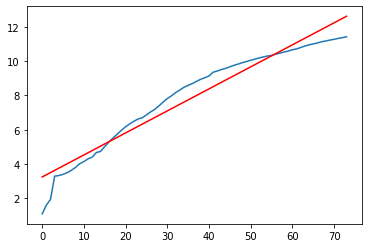

In [7]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

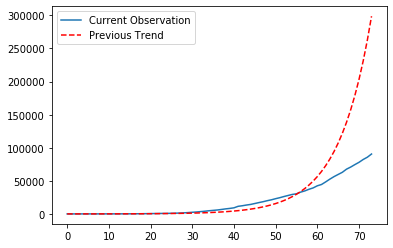

In [8]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [9]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9421958388172127

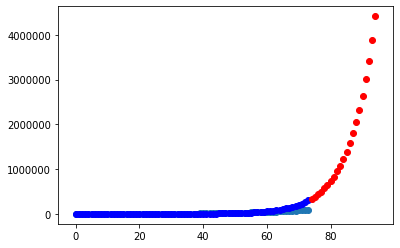

In [10]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [11]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
        91, 92, 93, 94]),
 array([[ 339590.22648262],
        [ 386036.44816644],
        [ 438835.1833812 ],
        [ 498855.27412732],
        [ 567084.39511896],
        [ 644645.30669743],
        [ 732814.33067797],
        [ 833042.35316346],
        [ 946978.69994175],
        [1076498.27735398],
        [1223732.42525662],
        [1391103.98978561],
        [1581367.19307052],
        [1797652.95598436],
        [2043520.41974807],
        [2323015.51421568],
        [2640737.53662418],
        [3001914.83641055],
        [3412490.85154511],
        [3879221.91217235],
        [4409788.42099005]]))

In [12]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
69,12-05-2020,3702,74519
70,13-05-2020,3485,78004
71,14-05-2020,4261,82265
72,15-05-2020,3449,85714


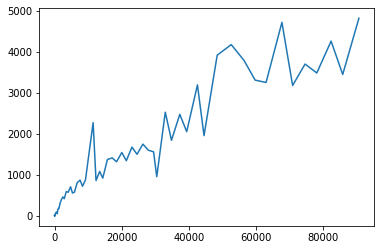

In [13]:
plt.plot(dt['confirmed'],dt['Infected'])

In [14]:
m

array([0.12819212])

In [15]:
1.0+m*14+m**2*24

array([3.18908687])